# Le cas du disque
## Trouver des modes à partir de l'équation :
$$\frac{n_{1}\frac{J_m'}{J_m}(n_{1}ka) J_m(n_2ka) - n_{2}J_m'(n_2ka)}{n_{2}Y_m'(n_{2}ka) - Y_m(n_{2}ka)n_{1}\frac{J_m'}{J_m}(n_{1}ka)} = \frac{n_{3}\frac{H_m'}{H_m}(n_{3}kb)J_m(n_{2}kb) - n_2J_m'(n_{2}kb)}{n_{2}Y_m'(n_{2}kb) - Y_m(n_2kb)n_3\frac{H_m'}{H_m}(n_{3}kb)}$$

$$\frac{A}{D} = \frac{C}{B}$$

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.optimize as op
import scipy.special as sp



def func(k,n,a,b, m) :
    A = (n[0]*sp.jvp(m, n[0]*(k[0]+k[1]*1j)*a)/sp.jv(m, n[0]*(k[0]+k[1]*1j)*a)*sp.jv(m,n[1]*(k[0]+k[1]*1j)*a) 
         - n[1]*sp.jvp(m, n[1]*(k[0]+k[1]*1j)*a))

    B = (n[1]*sp.yvp(m, n[1]*(k[0]+k[1]*1j)*b)
          - n[2]*sp.h1vp(m, n[2]*(k[0]+k[1]*1j)*b)/sp.hankel1(m, n[2]*(k[0]+k[1]*1j)*b)*sp.yv(m,n[1]*(k[0]+k[1]*1j)*b))

    C = (n[2]*sp.h1vp(m, n[2]*(k[0]+k[1]*1j)*b)/sp.hankel1(m, n[2]*(k[0]+k[1]*1j)*b)*sp.jv(m,n[1]*(k[0]+k[1]*1j)*b)
         -n[1]*sp.jvp(m, n[1]*(k[0]+k[1]*1j)*b))
     
    D = (n[1]*sp.yvp(m, n[1]*(k[0]+k[1]*1j)*a) 
         - n[0]*sp.jvp(m, n[0]*(k[0]+k[1]*1j)*a)/sp.jv(m, n[0]*(k[0]+k[1]*1j)*a)*sp.yv(m,n[1]*(k[0]+k[1]*1j)*a))
    
    return  np.abs(A*B - C*D)


## Méthodologie:
* Visualiser la fonction $f(k) = log(|AB - CD|)$
* Utiliser ```Scipy.optimize.minimize``` , ```method='SLSQP'``` avec les bornes correspond aux régions intéressées


## 1. Visualiser la fonction $f(k) = log(|AB - CD|)$

In [2]:
m = 30
n = [1,1.5,1]
a = 0.8
b = 1

<IPython.core.display.Javascript object>


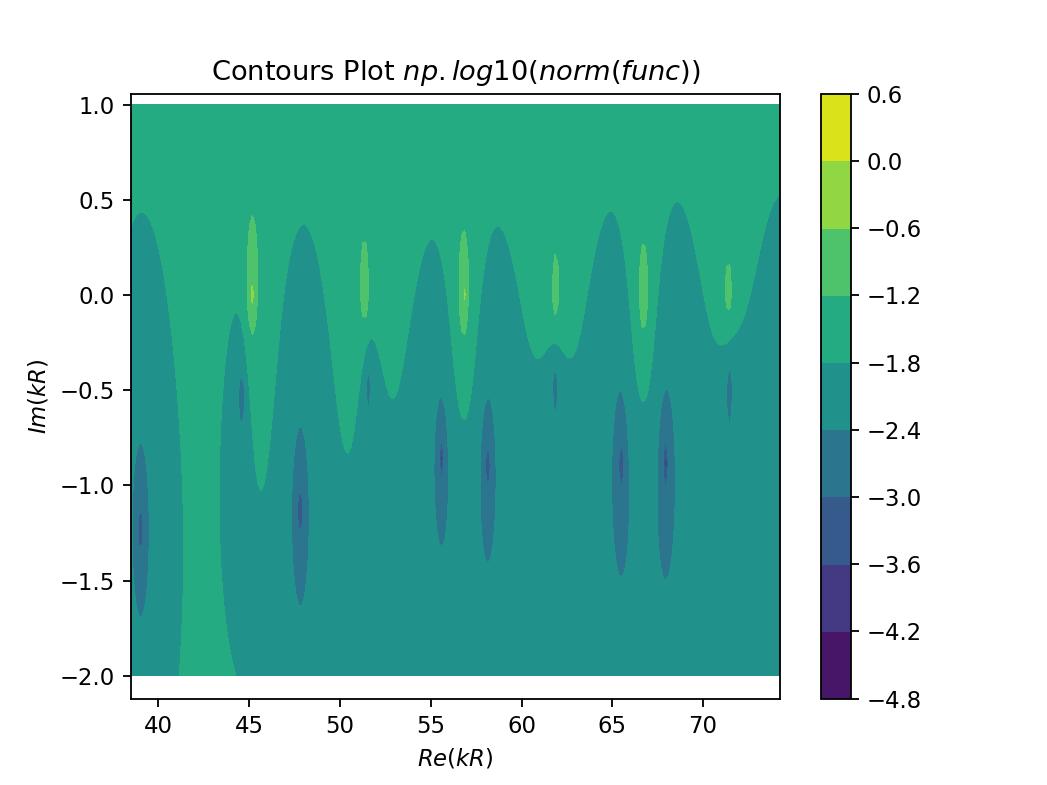

In [5]:
u = np.linspace(20, 100, 500)
v = np.linspace(-2, 1 ,500)
X, Y = np.meshgrid(u, v)

fig = plt.figure(dpi=150)
cp = plt.contourf(X, Y, np.log10(func((X,Y),n,a,b,m)))
fig.colorbar(cp)
plt.title('Contours Plot $np.log10(norm(func))$')
plt.xlabel('$Re(kR)$')
plt.ylabel('$Im(kR)$')
plt.show()
#plt.savefig('log10_norm_func')

## 2. Chercher les racines avec ```Scipy.optimize.minimize```
méthode utilisé : SLSQP avec la tolérence de $10^{-9}$

## cas m = 30

In [7]:
x0 = 20
d = 0.5
eps = 1e-7
roots = []
for i in np.arange(x0, 100, d):
    res = op.minimize(func, args=(n,a,b,m), x0=(2,0), method='SLSQP', bounds=((i,i+d),(-1,0.2))
                                      , options={'ftol':1e-10})
    if res.fun < eps:
        print(res.fun)
        roots.append(res.x)

6.782897576540552e-10
4.4728744688558044e-10
2.5884268436122687e-11
1.025767568748797e-10
1.5604089767928455e-10
1.3765946569557063e-11
2.2216536045958703e-11
2.1843146487486308e-11
1.0359534452916181e-10
1.3046500973801904e-10
3.5730213612427196e-11
2.650474894846301e-10
1.1741845119237542e-10
2.802330747926931e-10
4.0574423815870574e-11
4.4926518274955365e-11
8.180207863415905e-11
3.5302326885669937e-10


In [5]:
roots = np.array(roots)
roots_m30 = m + np.zeros((roots.shape[0], roots.shape[1]+1))
roots_m30[:,:-1] = roots
roots_m30

array([[ 2.30933471e+01, -5.96245654e-04,  3.00000000e+01],
       [ 2.69765603e+01, -7.33475921e-02,  3.00000000e+01],
       [ 3.21643675e+01, -6.93500421e-01,  3.00000000e+01],
       [ 4.45972821e+01, -5.31895131e-01,  3.00000000e+01],
       [ 5.15324655e+01, -4.75449755e-01,  3.00000000e+01],
       [ 5.56025421e+01, -8.59128040e-01,  3.00000000e+01],
       [ 5.81220097e+01, -8.96628135e-01,  3.00000000e+01],
       [ 6.18642103e+01, -4.80213401e-01,  3.00000000e+01],
       [ 6.54836394e+01, -8.89383285e-01,  3.00000000e+01],
       [ 6.79270799e+01, -8.82311696e-01,  3.00000000e+01],
       [ 7.14405936e+01, -4.88114649e-01,  3.00000000e+01],
       [ 7.49967872e+01, -7.90840252e-01,  3.00000000e+01],
       [ 7.74403947e+01, -9.78816560e-01,  3.00000000e+01],
       [ 8.06548918e+01, -5.12939900e-01,  3.00000000e+01],
       [ 8.42142179e+01, -6.46954609e-01,  3.00000000e+01],
       [ 8.96747970e+01, -5.92464741e-01,  3.00000000e+01],
       [ 9.31872190e+01, -5.36727058e-01

In [6]:
#np.savetxt('roots_m30', X = roots_m30, header='freq  imag  m')